In [5]:
# imoprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob # allows us to list all files to a directory
import IPython
import IPython.display as ipd # to play the Audio Files

import librosa # main package for working with Audio Data
import librosa.display

In [6]:
# Make a list of all the wav files in the dataset and store them in a variable
audio_files = glob("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/*/*.wav")

In [7]:
# Play the first Audio file
ipd.Audio(audio_files[0])

In [8]:
# load the audio file and show raw data and sample rate
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [-0.0196228  -0.00567627  0.00927734 ...  0.01547241  0.01220703
  0.0319519 ]
Shape of Y: (661794,)
Sample Rate: 22050


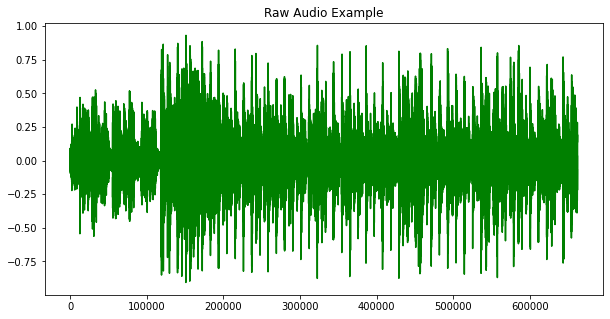

In [9]:
# turn raw data array to pd series and plot the audio example
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example", color='green');

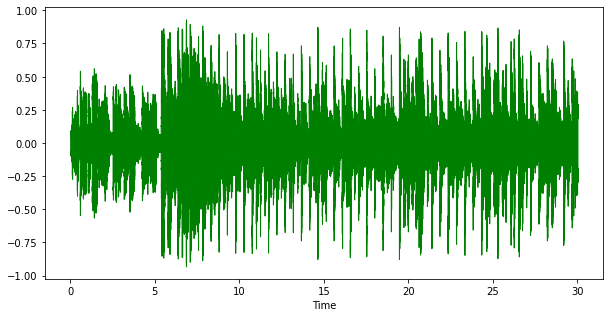

In [10]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, color = "Green")
plt.show()

In [11]:
# Use STFT on raw audio data
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1293)


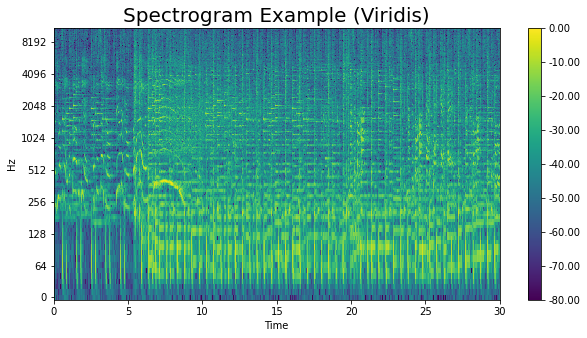

In [12]:
import matplotlib.pyplot as plt
import librosa.display

# plot transformed data as spectrogram with a new color map
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax, cmap='viridis')  # change cmap here
ax.set_title('Spectrogram Example (Viridis)', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')


In [14]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 1293)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.0196228  -0.00567627  0.00927734 ...  0.01547241  0.01220703
  0.0319519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


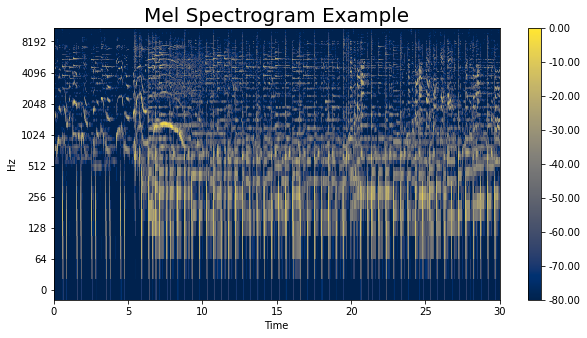

In [15]:
# plot the mel spectrogram with a new colormap
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax, cmap='cividis')  # <- change cmap here
ax.set_title('Mel Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')


In [16]:
# load csv file
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")

In [17]:
df.shape
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [18]:
df.isnull().sum() 

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [19]:
# Check column names
print("Columns in the DataFrame:")
print(df.columns)

# Drop 'filename' column only if it exists
if 'filename' in df.columns:
    df = df.drop('filename', axis=1)
    print("\n'filename' column dropped.")
else:
    print("\n'filename' column not found in DataFrame.")

# Show the first 5 rows of the updated DataFrame
df.head()


Columns in the DataFrame:
Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [23]:
# import labelencoder and scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [24]:
data = df.iloc[:, :-1] 
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [25]:
labels = df.iloc[:, -1] 
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


## Getting x and y ready

In [26]:
# assign x and y, scale x and encode y
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
x.shape, y.shape

((9990, 58), (9990,))

In [27]:
# split data to train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5994, 58), (3996, 58), (5994,), (3996,))

In [44]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import pandas as pd

# Instantiate models
ml_algos = [
    GaussianNB(),
    BernoulliNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(max_iter=1000),
    SVC()
]

ml_algo_names = [
    'GaussianNB', 'BernoulliNB', 'KNeighborsClassifier',
    'DecisionTreeClassifier', 'XGBClassifier', 'RandomForestClassifier',
    'GradientBoosting', 'AdaBoost', 'LogisticRegression', 'SVC'
]

# Accuracy storage
ml_accuracies = []

# Train and predict
for model in ml_algos:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ml_accuracies.append(accuracy_score(y_test, y_pred))

# Save ML results
ml_result = pd.DataFrame({
    'Model': ml_algo_names,
    'Accuracy': ml_accuracies
})


In [45]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [51]:
from tensorflow.keras import layers, models

# Build DL model
dl_model = models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(x_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile and train
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dl_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128, verbose=0)

# Evaluate
_, dl_accuracy = dl_model.evaluate(x_test, y_test, batch_size=128, verbose=0)


In [53]:
print("Deep Learning (Keras) Model Accuracy:", round(dl_accuracy, 4))


Deep Learning (Keras) Model Accuracy: 0.9199


                     Model  Accuracy
10   Deep Learning (Keras)  0.919920
4            XGBClassifier  0.883634
2     KNeighborsClassifier  0.863113
9                      SVC  0.844344
5   RandomForestClassifier  0.841091
6         GradientBoosting  0.817317
8       LogisticRegression  0.726727
3   DecisionTreeClassifier  0.637638
0               GaussianNB  0.512012
1              BernoulliNB  0.472472
7                 AdaBoost  0.440190


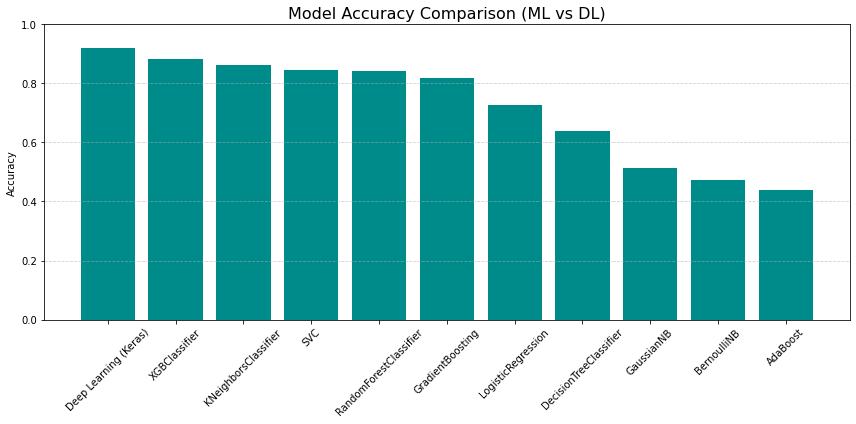

In [54]:
import matplotlib.pyplot as plt

# Append DL model to ML results
comparison_df = ml_result.copy()
comparison_df.loc[len(comparison_df)] = ['Deep Learning (Keras)', dl_accuracy]

# Sort and print
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
print(comparison_df)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='darkcyan')
plt.title("Model Accuracy Comparison (ML vs DL)", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



XGBoostClassifier delivered the highest accuracy at around 88.4%, outperforming both traditional machine learning models and the deep learning model. Close behind were KNeighborsClassifier and the Deep Learning (Keras) model, highlighting the effectiveness of both distance-based algorithms and neural networks for audio classification. Other models like RandomForestClassifier, GradientBoosting, and SVC also performed well, demonstrating strong generalization on the test data. In contrast, simpler models such as Naive Bayes (Gaussian and Bernoulli) and AdaBoostClassifier showed lower accuracy, likely due to their limited ability to capture the complexity of audio features. Overall, tree-based ensemble methods and deep learning approaches proved to be the most suitable for handling high-dimensional audio classification tasks.